In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

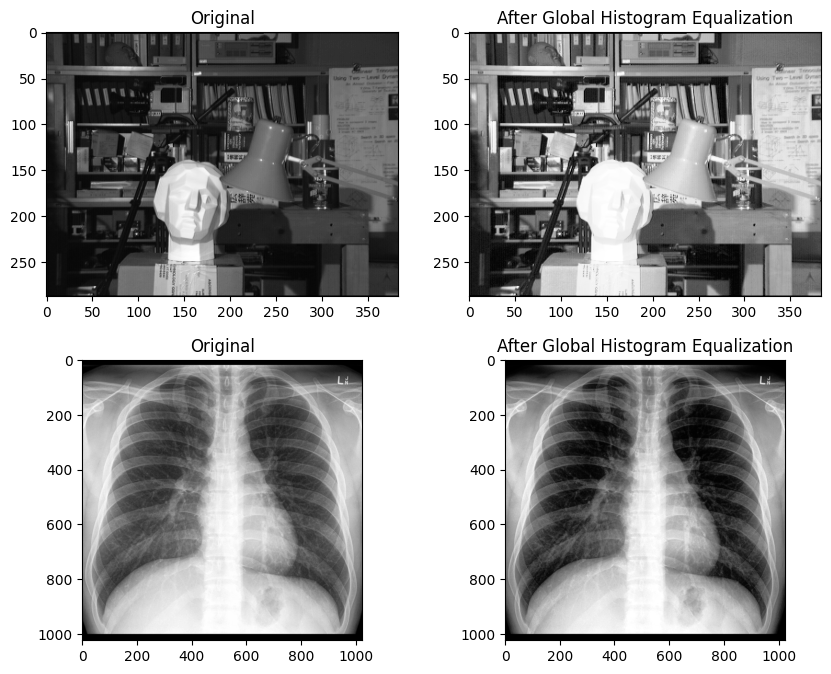

In [3]:
# Read the first and second images
firstImage = cv2.imread('statue.png', 0)
secondImage = cv2.imread('xray.jpg', 0)

# Perform histogram equalization
firstResult = cv2.equalizeHist(firstImage)
secondResult = cv2.equalizeHist(secondImage)

# Plotting
plt.figure(figsize=[10, 8])

# First image - Original and after global histogram equalization
plt.subplot(221)
plt.imshow(firstImage, cmap='gray')
plt.title("Original")

plt.subplot(222)
plt.imshow(firstResult, cmap='gray')
plt.title("After Global Histogram Equalization")

# Second image - Original and after global histogram equalization
plt.subplot(223)
plt.imshow(secondImage, cmap='gray')
plt.title("Original")

plt.subplot(224)
plt.imshow(secondResult, cmap='gray')
plt.title("After Global Histogram Equalization")

plt.show()

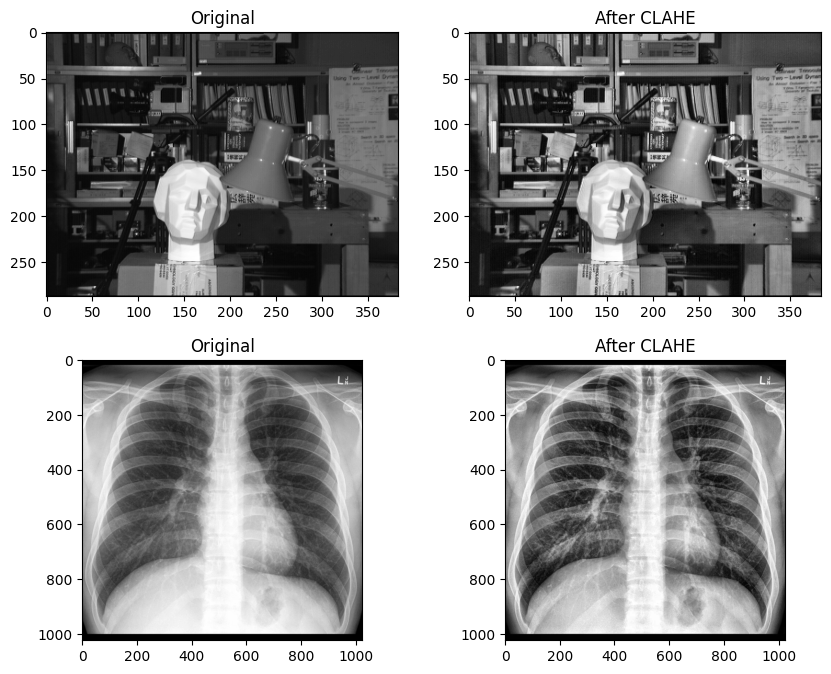

In [4]:
# Create CLAHE objects with specified parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the first and second images
result1 = clahe.apply(firstImage)
result2 = clahe.apply(secondImage)

# Plotting
plt.figure(figsize=[10, 8])

# First image - Original and after CLAHE
plt.subplot(221)
plt.imshow(firstImage, cmap='gray')
plt.title("Original")

plt.subplot(222)
plt.imshow(result1, cmap='gray')
plt.title("After CLAHE")

# Second image - Original and after CLAHE
plt.subplot(223)
plt.imshow(secondImage, cmap='gray')
plt.title("Original")

plt.subplot(224)
plt.imshow(result2, cmap='gray')
plt.title("After CLAHE")

plt.show()

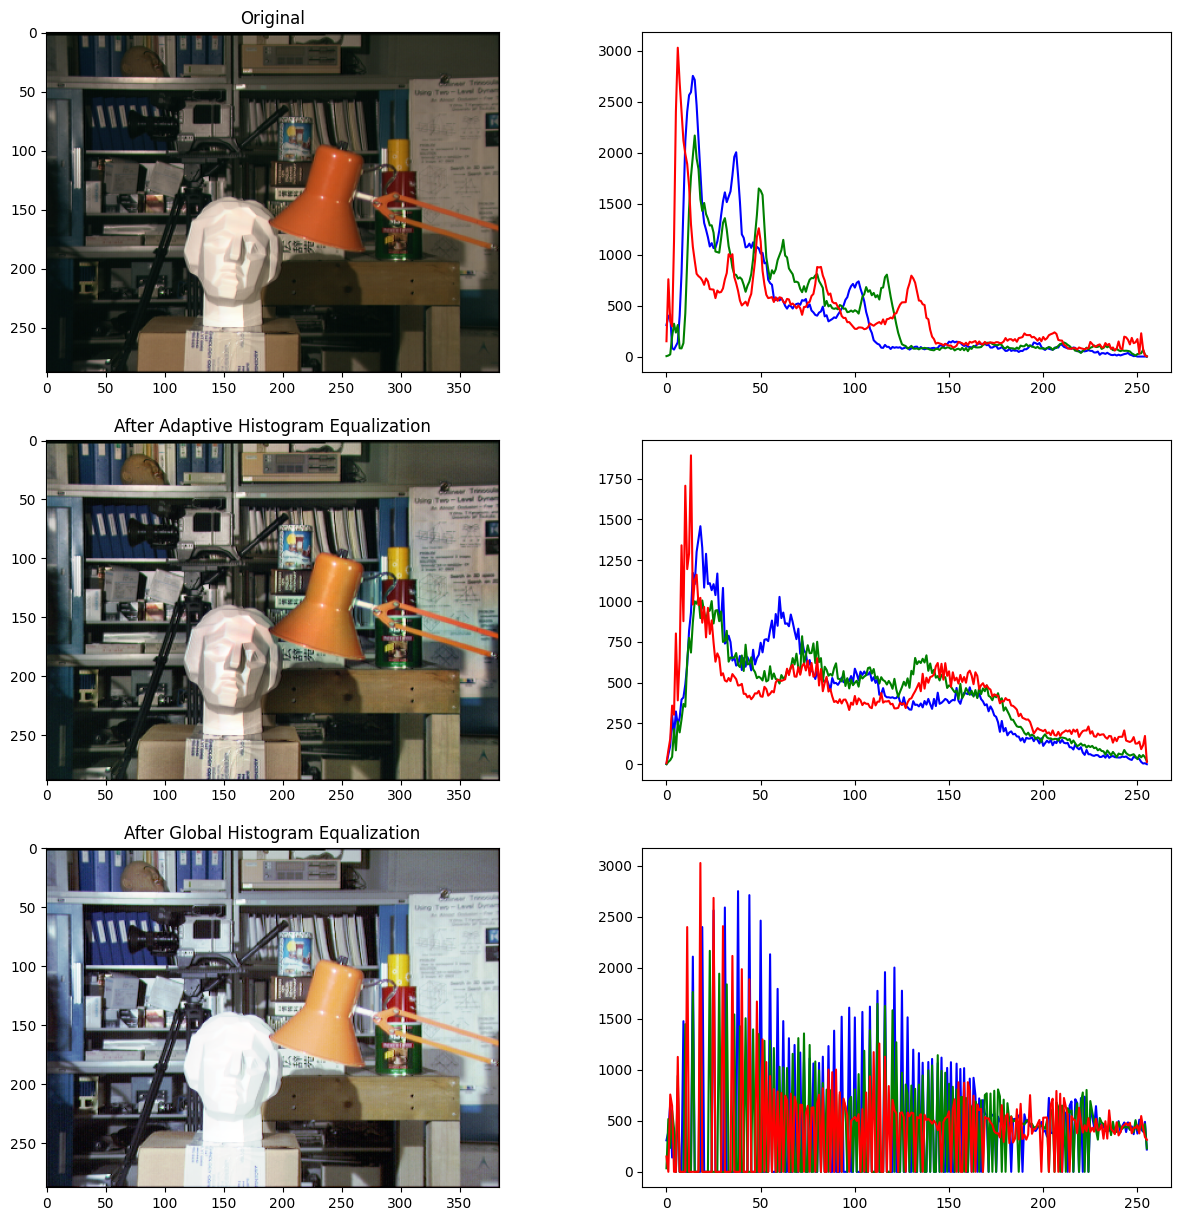

In [5]:
# Read the image
image = cv2.imread('statue.png')

# Split the image into channels
channels = cv2.split(image)

# Create CLAHE object with specified parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to each channel separately
eq_channels_clahe = [clahe.apply(ch) for ch in channels]

# Merge the channels back together
eq_clahe_image = cv2.merge(eq_channels_clahe)

# Apply histogram equalization to each channel separately
eq_channels_hist = [cv2.equalizeHist(ch) for ch in channels]

# Merge the channels back together
eq_image = cv2.merge(eq_channels_hist)

# Plotting
plt.figure(figsize=[15, 15])

# Original image
plt.subplot(321)
plt.imshow(image[...,::-1])
plt.title("Original")

# Image after CLAHE
plt.subplot(323)
plt.imshow(eq_clahe_image[...,::-1])
plt.title("After Adaptive Histogram Equalization")

# Image after global histogram equalization
plt.subplot(325)
plt.imshow(eq_image[...,::-1])
plt.title("After Global Histogram Equalization")

# Plotting histograms for each channel
color = ('b', 'g', 'r')

# Histogram for original image
plt.subplot(322)
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col)

# Histogram for image after CLAHE
plt.subplot(324)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col)

# Histogram for image after global histogram equalization
plt.subplot(326)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=col)

plt.show()

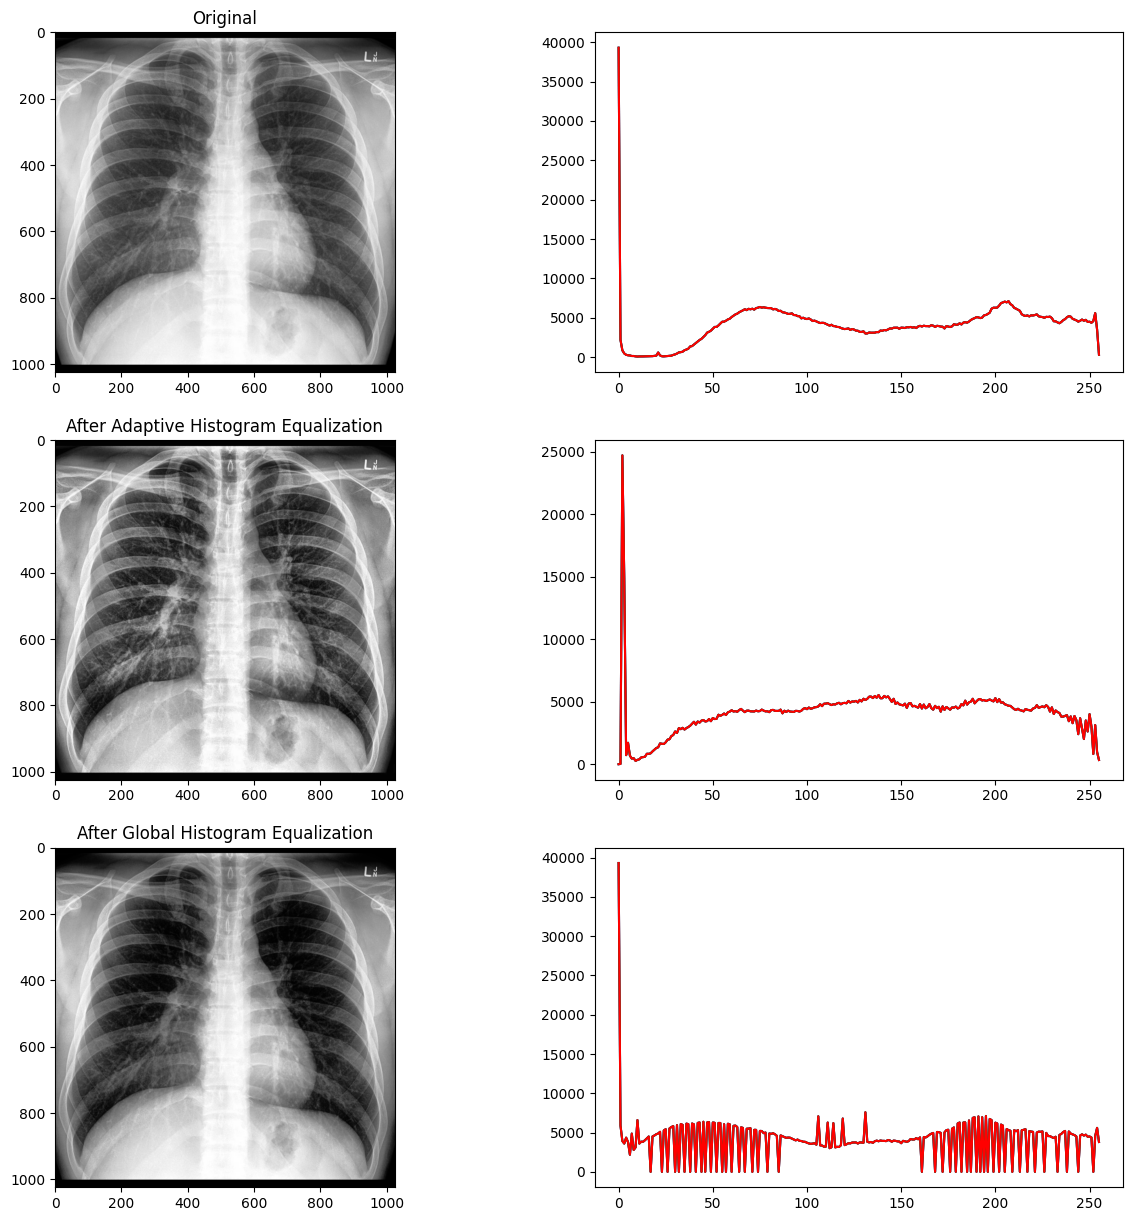

In [6]:
# Read the image
image = cv2.imread('xray.jpg')

# Split the image into separate color channels (Blue, Green, Red)
channels = cv2.split(image)

# Create a CLAHE (Contrast Limited Adaptive Histogram Equalization) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply CLAHE to each color channel
eq_channels_clahe = [clahe.apply(ch) for ch in channels]

# Merge the equalized channels back into an image
eq_clahe_image = cv2.merge(eq_channels_clahe)

# Apply global histogram equalization to each color channel
eq_channels_hist = [cv2.equalizeHist(ch) for ch in channels]

# Merge the equalized channels back into an image
eq_image = cv2.merge(eq_channels_hist)

# Set up the plot figure
plt.figure(figsize=[15,15])

# Plot the original image
plt.subplot(321)
plt.imshow(image[...,::-1])
plt.title("Original")

# Plot the image after adaptive histogram equalization
plt.subplot(323)
plt.imshow(eq_clahe_image[...,::-1])
plt.title("After Adaptive Histogram Equalization")

# Plot the image after global histogram equalization
plt.subplot(325)
plt.imshow(eq_image[...,::-1])
plt.title("After Global Histogram Equalization")

# Calculate and plot the histograms for the original image
color = ('b', 'g', 'r')
plt.subplot(322)
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

# Calculate and plot the histograms for the image after adaptive histogram equalization
plt.subplot(324)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_clahe_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

# Calculate and plot the histograms for the image after global histogram equalization
plt.subplot(326)
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)

# Show the plot
plt.show()